In [1]:
import numpy as np
import stim
from matplotlib import pyplot as plt

## Basic circuit

In [2]:
circuit = stim.Circuit()

# First, the circuit will initialize a Bell pair.
circuit.append("H", [0])
circuit.append("CNOT", [0, 1])

# Then, the circuit will measure both qubits of the Bell pair in the Z basis.
circuit.append("M", [0, 1])

circuit.diagram()

q0: -H-@-M:rec[0]-
       |
q1: ---X-M:rec[1]-

In [3]:
sampler = circuit.compile_sampler()
print(sampler.sample(shots=10))

[[ True  True]
 [ True  True]
 [ True  True]
 [ True  True]
 [False False]
 [ True  True]
 [False False]
 [ True  True]
 [False False]
 [ True  True]]


## Detector annotations

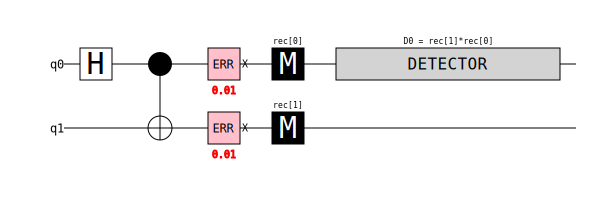

In [4]:
error_p = 0.01
circuit = stim.Circuit()
circuit.append("H", [0])
circuit.append("CNOT", [0, 1])
circuit.append("X_ERROR", [0, 1], error_p)
circuit.append("M", [0, 1])
circuit.append("DETECTOR", [stim.target_rec(-1), stim.target_rec(-2)])
circuit.diagram("timeline-svg")

In [5]:
shots = 10**6

sampler = circuit.compile_sampler()
res = sampler.sample(shots)
print(np.unique(res, return_counts=True, axis=0))

sampler = circuit.compile_detector_sampler()
res = sampler.sample(shots)
print(np.unique(res, return_counts=True))
print(np.sum(res) / shots, 2 * error_p * (1 - error_p))

(array([[False, False],
       [False,  True],
       [ True, False],
       [ True,  True]]), array([489808,   9705,   9867, 490620]))
(array([False,  True]), array([979847,  20153]))
0.020153 0.0198


## Repetition code

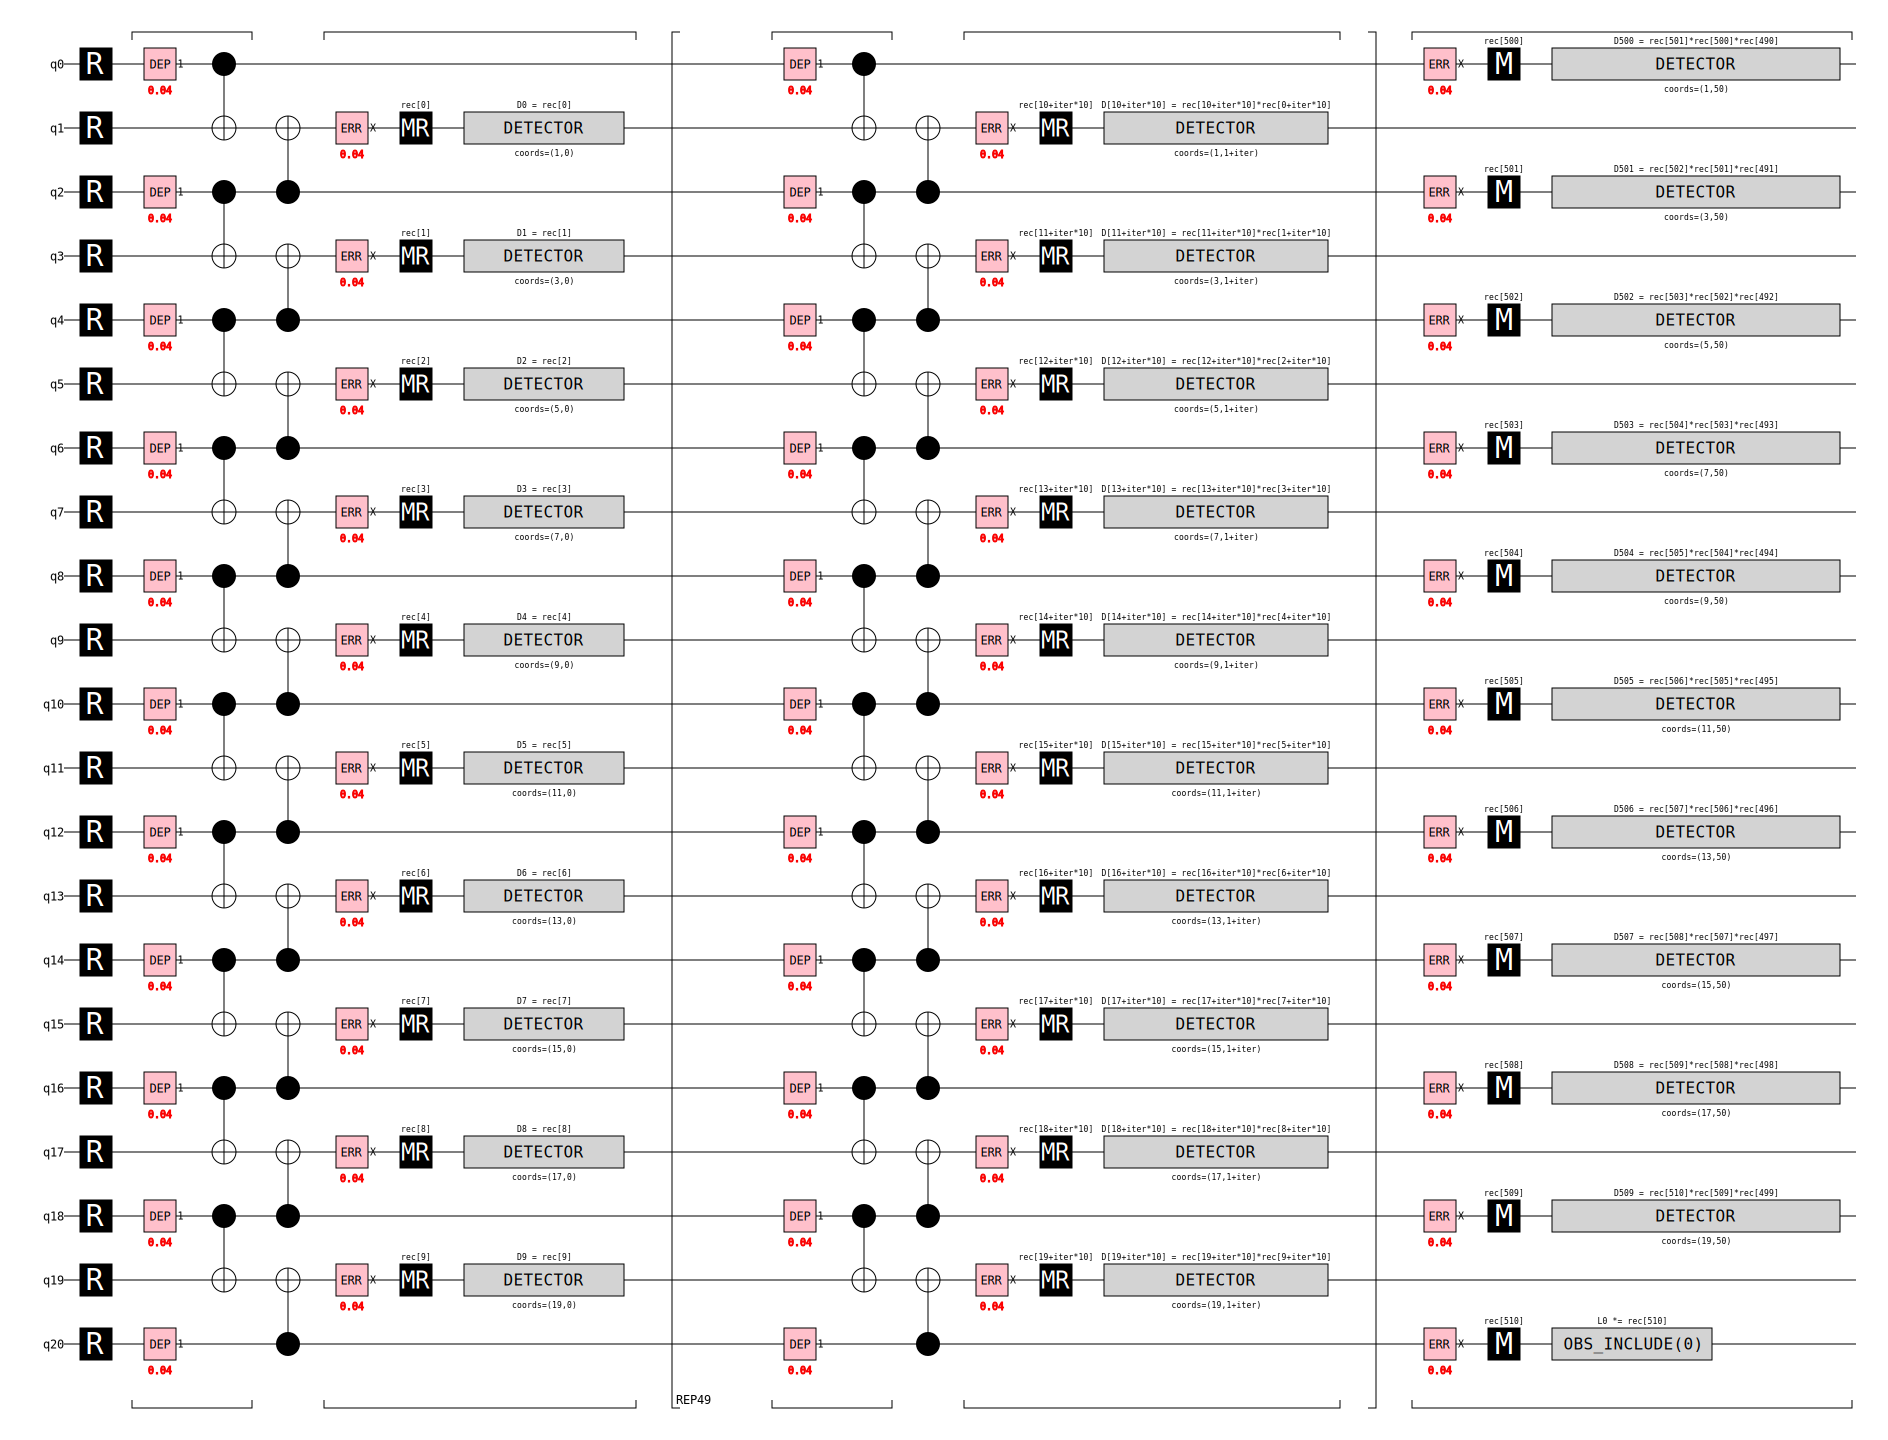

In [6]:
distance = 11
rounds = 50
circuit = stim.Circuit.generated(
    "repetition_code:memory",
    distance=distance,
    rounds=rounds,
    before_round_data_depolarization=0.04,
    before_measure_flip_probability=0.04,
)
circuit.diagram("timeline-svg")

(10000, 510)
(51, 10)


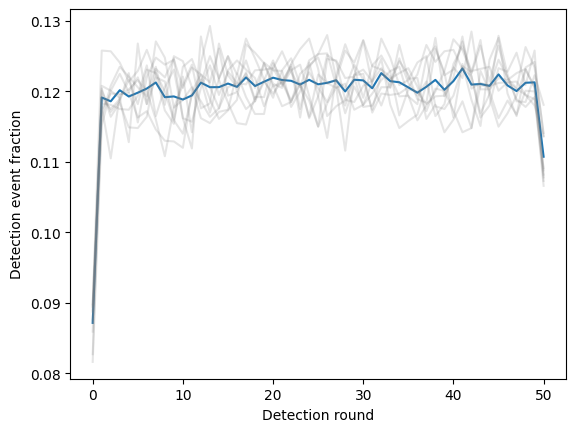

In [7]:
shots = 10**4
detector_sampler = circuit.compile_detector_sampler()
detector_sample = detector_sampler.sample(shots)
print(detector_sample.shape)

res = detector_sample.mean(axis=0)
res = res.reshape((rounds + 1, distance - 1))
print(res.shape)

plt.plot(res.mean(axis=1))
plt.plot(res, "gray", alpha=0.2)
plt.xlabel("Detection round")
plt.ylabel("Detection event fraction")
plt.show()